In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
np.random.seed(1)
from tensorflow import set_random_seed
set_random_seed(1)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from neural_stylization.transfer_style import Stylizer
from neural_stylization.optimizers import SGD, Adam, L_BFGS
from neural_stylization.util.build_callback import build_callback
from neural_stylization.util.img_util import load_image

Using TensorFlow backend.


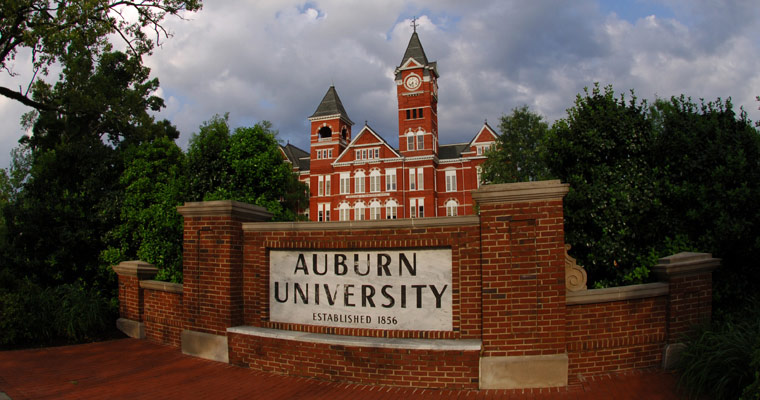

In [5]:
# the shape to load content, style, and ouptut as (w, h)
# None implies the size of the content will be used
image_size = None
# the location of the base content image
content_path = 'img/content/samford-sign.jpg'
# load and view the image with its dimensions
load_image(content_path, image_size)

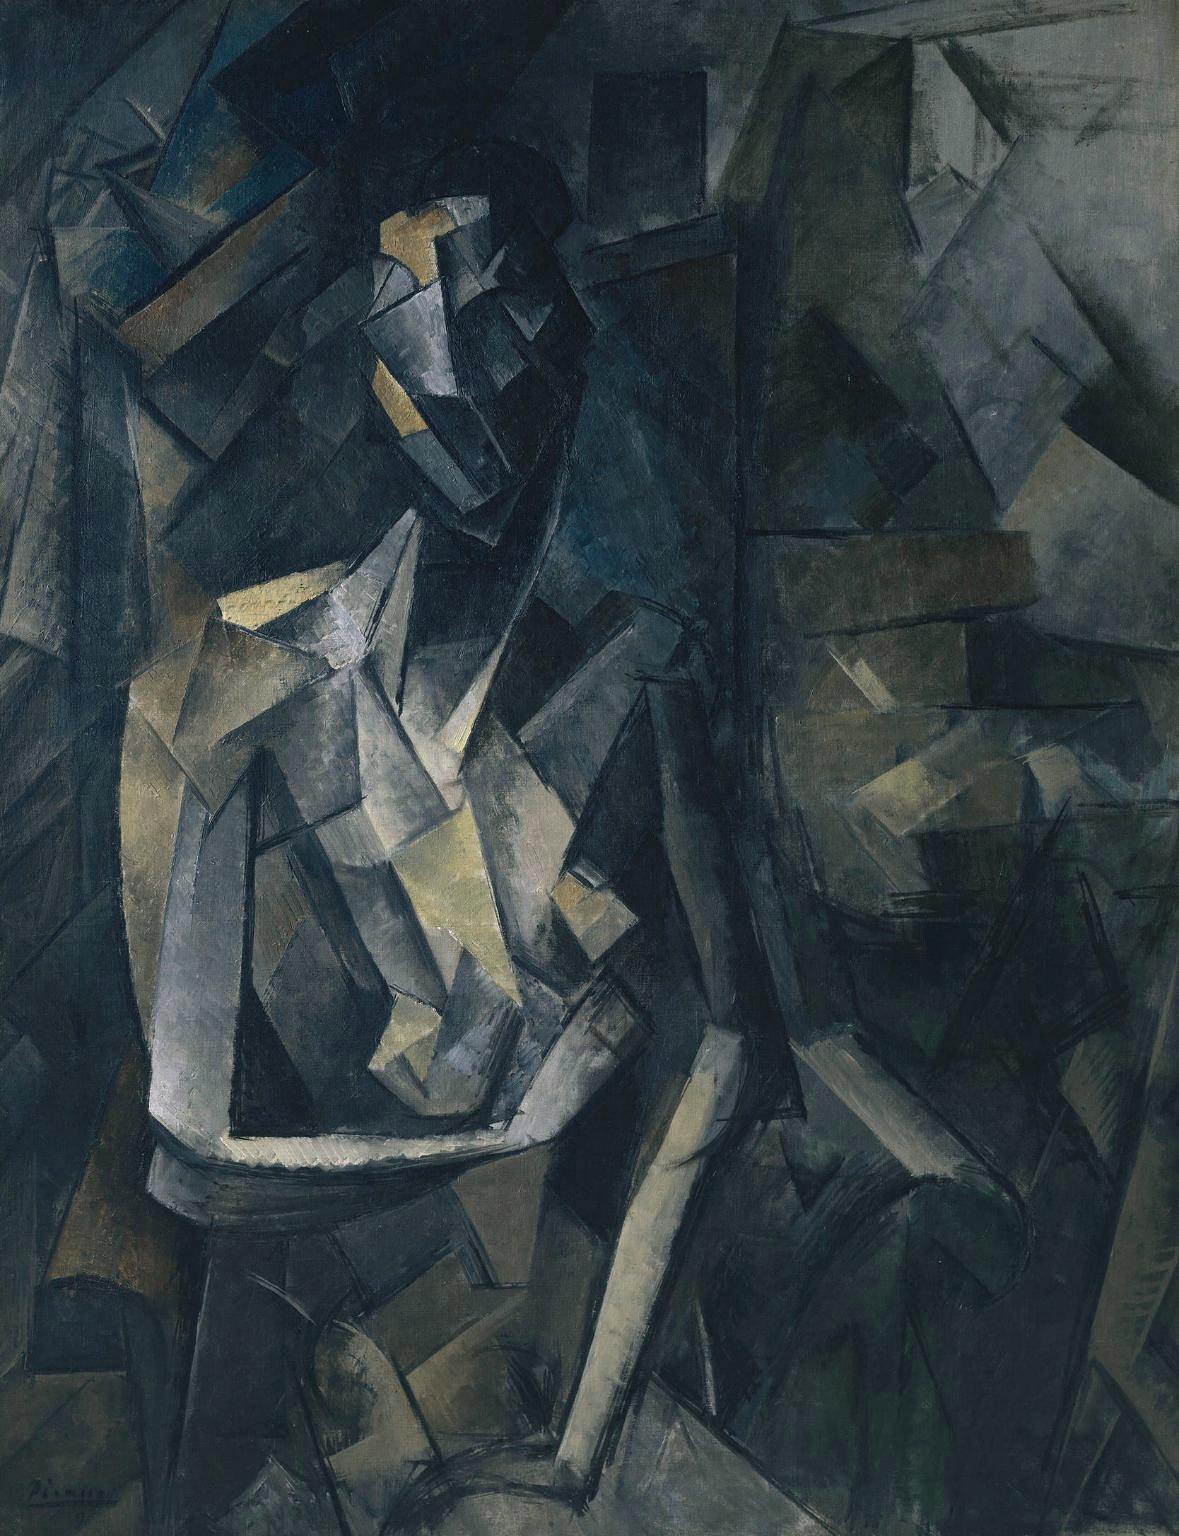

In [6]:
# the location of the base style image
style_path = 'img/styles/seated-nude.jpg'
# load and view the image with its dimensions
load_image(style_path, image_size)

In [7]:
!mkdir -p tex/img/loss

In [8]:
def stylize(optimizer, iterations: int):
    """
    Stylize the image.
    
    Args:
        optimizer: the optimizer method to use
        iterations: the number of iterations to optimize
        
    Returns: a stylized image
    """
    # create a stylization algorithm
    sty = Stylizer(content_weight=1, style_weight=1e4)
    # create directories for build artifacts
    build_dir = 'build/loss/{}'.format(optimizer.__class__.__name__)
    # run the stlization algorithm and store the result
    img = sty(
        content_path=content_path,
        style_path=style_path,
        optimize=optimizer,
        iterations=iterations,
        image_size=image_size,
        callback=build_callback(build_dir)
    )
    # save the image to the tex directory
    tex_out = 'tex/img/loss/{}.png'.format(optimizer.__class__.__name__)
    img.save(tex_out)

In [9]:
# the maximum number of times each optimizer is allowed to 
# evaluate the gradients before termination
max_evaluations = 150

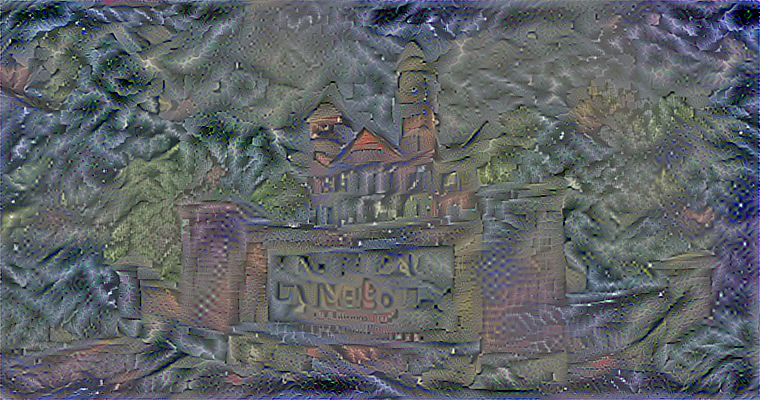

100%|██████████| 150/150 [01:09<00:00,  2.17it/s]


In [10]:
sgd = SGD(learning_rate=5e-5)
stylize(sgd, max_evaluations)

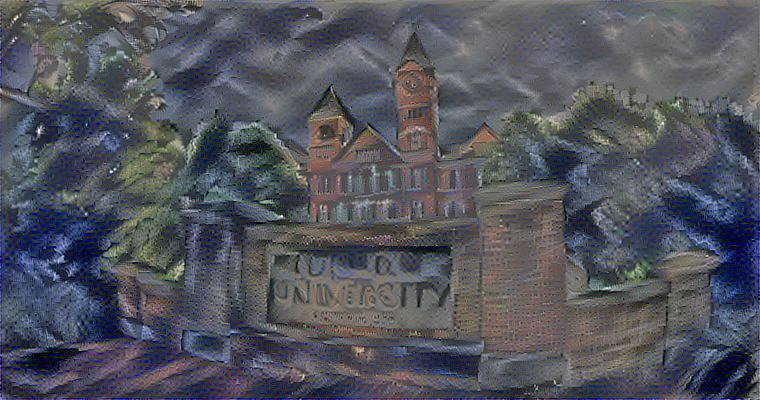

100%|██████████| 7/7 [00:56<00:00,  8.14s/it]


In [11]:
# L-BFGS has its own maximum evaluation
# per iteration setting
lbfgs = L_BFGS(max_evaluations=20)
stylize(lbfgs, int(max_evaluations / 20))

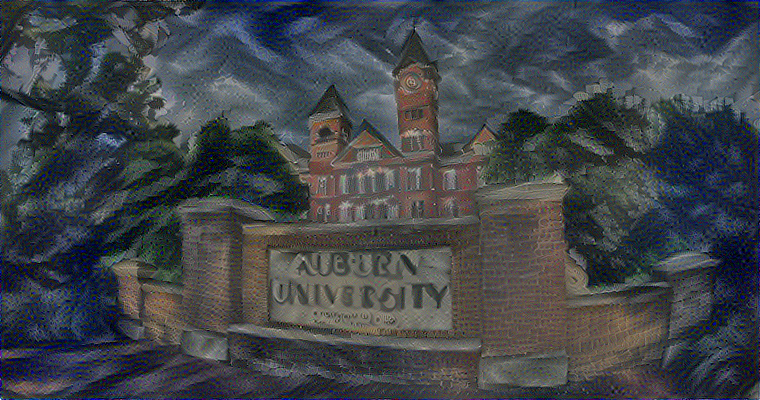

100%|██████████| 150/150 [01:05<00:00,  2.29it/s]


In [12]:
adam = Adam(learning_rate=1e2)
stylize(adam, max_evaluations)

# Comparing Loss Optimization

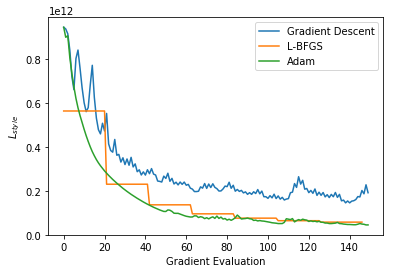

In [13]:
plt.plot(sgd.loss_history)
plt.plot(lbfgs.loss_history)
plt.plot(adam.loss_history)
plt.legend(['Gradient Descent', 'L-BFGS', 'Adam'])
plt.ylabel('$L_{style}$')
plt.xlabel('Gradient Evaluation')
plt.savefig('tex/img/loss/plot.png')